In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['patch.force_edgecolor'] = True
import nltk
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
import spacy
from sklearn.metrics import f1_score
nlp = spacy.load("en_core_web_sm")

In [ ]:
messages = pd.read_csv("/content/spam.csv", encoding='latin-1')
messages = messages.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
messages.columns = ["category", "text"]

In [ ]:
display(messages.head(10))

,category,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [ ]:
(messages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  5572 non-null   object
 1   text      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
messages.shape

(5572, 2)

In [ ]:
messages.isnull().sum()

category    0
text        0
dtype: int64

In [ ]:
len=messages['text']
max(len)

'ÌÏ wait 4 me in sch i finish ard 5..'

In [ ]:
messages["messageLength"] = messages["text"].str.len()
messages["messageLength"].describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: messageLength, dtype: float64

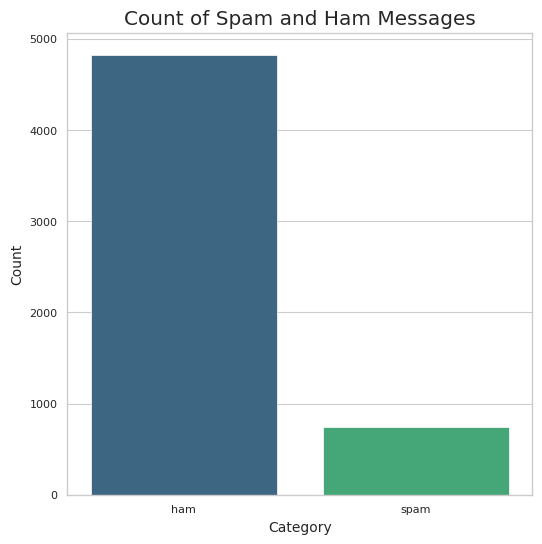

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(x='category', data=messages, palette='viridis')

# Adding labels
plt.title('Count of Spam and Ham Messages')
plt.xlabel('Category')
plt.ylabel('Count')

# Show the plot
plt.show()

In [ ]:
topMessages = messages.groupby("text").size().reset_index(name='count').sort_values(by='count', ascending=False).head(10)
display(topMessages)


,text,count
3666,"Sorry, I'll call later",30
1759,I cant pick the phone right now. Pls send a me...,12
3161,Ok...,10
4910,Your opinion about me? 1. Over 2. Jada 3. Kusr...,4
4406,"Wen ur lovable bcums angry wid u, dnt take it ...",4
3297,Please call our customer service representativ...,4
3189,Okie,4
3469,"Say this slowly.? GOD,I LOVE YOU &amp; I NEED ...",4
92,7 wonders in My WORLD 7th You 6th Ur style 5th...,4
3141,Ok.,4


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
X=messages.copy()
y=messages['text']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(messages["text"], messages["category"], test_size=0.2, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer(encoding="latin-1", strip_accents="unicode", stop_words="english")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(X_train_tfidf.shape)
print(y_train.shape)


(4457, 7470)
(4457,)


In [ ]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)


MultinomialNB()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(encoding = "latin-1", strip_accents = "unicode", stop_words = "english")
features = vec.fit_transform(messages["text"])
print(features.shape)

(5572, 8402)


In [ ]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
y_pred = model.predict(X_test_tfidf)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, pos_label="spam")
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9668161434977578
F1 Score: 0.8593155893536121
Confusion Matrix:
[[965   0]
 [ 37 113]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [ ]:
X_test_tfidf = vectorizer.transform(X_test)
accuracy = model.score(X_test_tfidf, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9668161434977578
